In [4]:
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import torch
import torch.nn.functional as F
from torch.autograd import Variable

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
!pwd

/Users/alexisrutherford/Desktop/foh_vae


In [5]:
df = pd.read_csv('MergedData.csv')

In [7]:
df = df.iloc[:,1:]

In [8]:
df = df.iloc[:,1:]

In [9]:
df.head()

,Probability,Achievement,Independence,Recognition,Relationships,Support,Working Conditions
0,0.015,6.50,6.835,6.500,5.00,4.33,6.33
1,0.160,5.33,6.000,5.670,6.33,4.67,6.00
2,0.039,5.33,5.330,5.165,5.00,4.00,5.08
3,0.014,6.00,5.670,5.330,5.67,5.00,6.17
4,0.013,5.33,5.670,4.670,4.00,5.33,5.50


In [10]:
dfNet = pd.read_csv('adjMat.csv')

In [11]:
dfNet.set_index(dfNet.iloc[:,0],inplace = True)

In [12]:
dfNet.set_index(dfNet.iloc[:,0],inplace = True)

In [13]:
dfNet = dfNet.iloc[:,1:]

In [14]:
dfNet.head()

,11-1011,11-1021,11-2011,11-2021,11-2022,11-2031,11-3011,11-3021,11-3031,11-3051,...,53-7061,53-7062,53-7063,53-7064,53-7071,53-7072,53-7073,53-7081,53-7111,53-7121
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
11-1011,0.000000,0.503597,0.656489,0.705882,0.640288,0.686567,0.618705,0.598540,0.633094,0.312500,...,0.092308,0.046154,0.104712,0.198895,0.107527,0.112299,0.119565,0.071795,0.085561,0.111702
11-1021,0.503597,0.000000,0.492308,0.503597,0.496350,0.549618,0.590551,0.507692,0.545455,0.416667,...,0.158537,0.138365,0.125749,0.204969,0.122699,0.170886,0.150943,0.155280,0.118012,0.177215
11-2011,0.656489,0.492308,0.000000,0.722222,0.601504,0.674603,0.590909,0.511111,0.630769,0.226415,...,0.093923,0.080000,0.082873,0.160920,0.067039,0.084270,0.091429,0.077778,0.080460,0.071823
11-2021,0.705882,0.503597,0.722222,0.000000,0.676471,0.779528,0.666667,0.598540,0.759690,0.312500,...,0.097938,0.085106,0.098958,0.166667,0.084211,0.089005,0.095745,0.077320,0.079787,0.100000
11-2022,0.640288,0.496350,0.601504,0.676471,0.000000,0.681818,0.625000,0.546763,0.689394,0.295597,...,0.123656,0.117318,0.125000,0.189944,0.109890,0.127072,0.128492,0.114130,0.117978,0.132597


## Binary weights

In [15]:
dfBin = dfNet > 0.3

In [16]:
edges1 = []
edges2 = []
edges = []

for i in range(df.shape[0]):
    for j in range(i+1,df.shape[0]):
        if dfBin.iloc[i,j]:
            edges.extend([[i,j],[j,i]])
            
            edges1.extend([i,j])
            edges2.extend([i,j])
            

In [100]:
edge_index = torch.tensor([edges1,edges2], dtype=torch.long)

In [101]:
(df.shape[0]*(df.shape[0] - 1))/2

270480.0

In [102]:
edge_index.shape

torch.Size([2, 259000])

## Weighted

In [748]:
from itertools import combinations_with_replacement,combinations

In [749]:
list(combinations_with_replacement(range(3),2))

[(0, 0), (0, 1), (0, 2), (1, 1), (1, 2), (2, 2)]

In [103]:
x = torch.tensor(df.values, dtype=torch.float)

In [104]:
y = torch.tensor(df['Working Conditions'].values, dtype=torch.float)
# Try making target the work value itself

In [58]:
df.head()

,Probability,Achievement,Independence,Recognition,Relationships,Support,Working Conditions
0,0.015,6.50,6.835,6.500,5.00,4.33,6.33
1,0.160,5.33,6.000,5.670,6.33,4.67,6.00
2,0.039,5.33,5.330,5.165,5.00,4.00,5.08
3,0.014,6.00,5.670,5.330,5.67,5.00,6.17
4,0.013,5.33,5.670,4.670,4.00,5.33,5.50


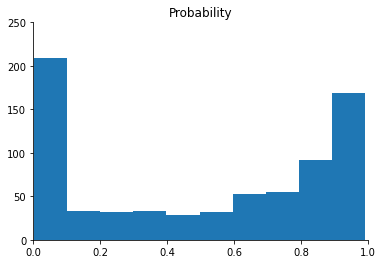

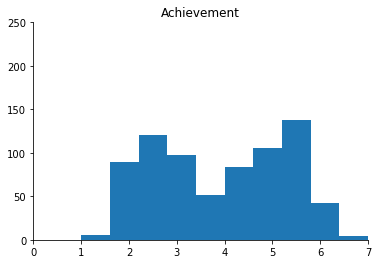

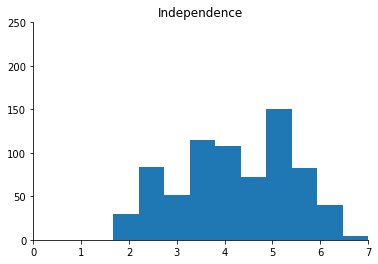

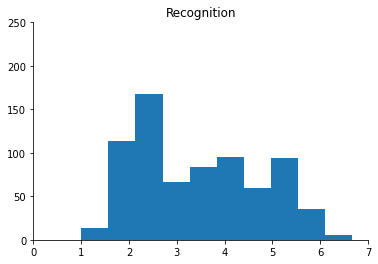

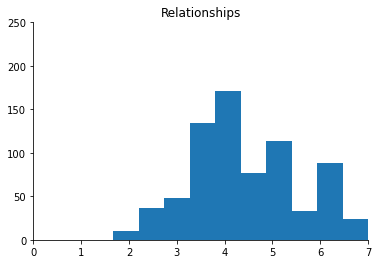

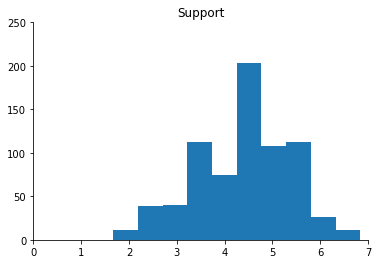

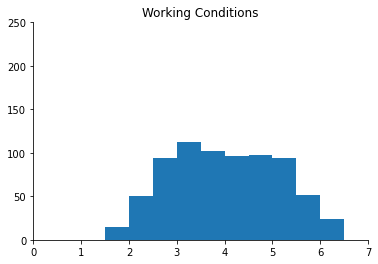

In [22]:
for c in df.columns:

    fig, ax = plt.subplots()
        
    if c == 'Probability':
        plt.xlim(0,1.0)
        
    else:
        plt.xlim(0,7)

    plt.hist(df[c],bins = 10)
    
    plt.title(c)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.ylim(0,250)

        
    plt.savefig('figs/hist_{:s}.png'.format(c.lower()),dpi = 300)

In [23]:
!rm figs/hist_all.png
!montage -geometry +0+0 -tile 2x4 figs/hist*png figs/hist_all.png
!montage -geometry +0+0 -tile 2x4 figs/hist_achievement.png figs/hist_independence.png figs/hist_recognition.png \
figs/hist_relationships.png figs/hist_support.png figs/hist_working\ conditions.png figs/hist_all_wvs.png

## Make test/train split

In [105]:
prop = int(y.shape[0]*0.9)
prop_bar = y.shape[0] - prop

In [106]:
train_mask = torch.cat((torch.zeros(prop_bar),torch.ones(prop)))

In [107]:
train_mask = train_mask.long()

In [108]:
test_mask = torch.cat((torch.ones(prop_bar),torch.zeros(prop)))

In [109]:
test_mask = test_mask.long()

In [110]:
edge_index.t().contiguous().T

tensor([[  0,   1,   0,  ..., 735, 734, 735],
        [  0,   1,   0,  ..., 735, 734, 735]])

## Make data object

In [145]:
data = Data(x=x, y=y, edge_index=edge_index.t().contiguous().T,train_mask = train_mask, test_mask = test_mask)

In [146]:
x.shape

torch.Size([736, 7])

In [147]:
y.shape

torch.Size([736])

In [125]:
edge_index.shape

torch.Size([2, 259000])

In [126]:
edge_index=edge_index.t().contiguous().T

In [148]:
data['x'].shape

torch.Size([736, 7])

In [128]:
edge_index.shape

torch.Size([2, 259000])

## Make a network

In [138]:
class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(-1, 2)
        self.conv2 = GCNConv(2, 1) # Try to predict one single work value
        
    def forward(self,data):
        x, edge_index = data.x, data.edge_index
        
        x = self.conv1(x, edge_index)
        #x = F.dropout(x, training=self.training)
        x = self.conv2(x,edge_index)

        return x

In [139]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN().to(device)

In [140]:
data = data.to(device)

In [141]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

In [142]:
model.train()

GCN(
  (conv1): GCNConv(-1, 2)
  (conv2): GCNConv(2, 1)
)

In [143]:
data

Data(x=[7, 736], edge_index=[2, 259000], y=[736], train_mask=[736], test_mask=[736])

In [144]:
for epoch in range(200):
    optimizer.zero_grad()
    out = model(data)
    #loss = F.mse_loss(Variable(data.x[data.train_mask,0],requires_grad = True), data.y[data.train_mask])
    loss = F.mse_loss(Variable(data.x,requires_grad = True), data.y)
    loss.backward()
    optimizer.step()

IndexError: index 143 is out of bounds for dimension 0 with size 7

In [626]:
model.eval()

GCN(
  (conv1): GCNConv(-1, 2)
  (conv2): GCNConv(2, 1)
)

In [627]:
pred = model(data)

RuntimeError: torch.cat(): Sizes of tensors must match except in dimension 1. Got 259000 and 2 in dimension 0 (The offending index is 1)

In [628]:
pred.shape

torch.Size([736, 1])

In [629]:
loss = F.mse_loss(pred[:,0],data.y)

In [630]:
loss.abs().item(),np.sqrt(loss.abs().item())

(3.313697576522827, 1.8203564421625857)

In [405]:
type(pred.detach().numpy())

numpy.ndarray

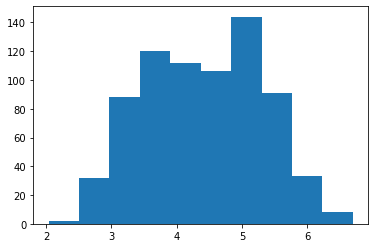

In [696]:
_ = plt.hist(pred.detach().numpy())

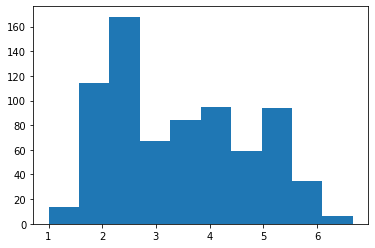

In [735]:
_ = plt.hist(data.y.detach().numpy())

Text(0, 0.5, 'True')

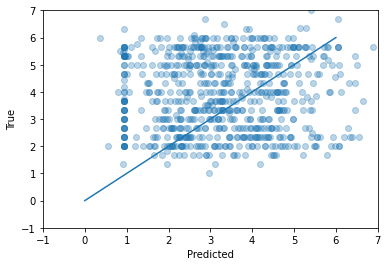

In [445]:
plt.scatter(pred.detach().numpy(),data.y.detach().numpy(),alpha = 0.3)

plt.xlim(-1,7)
plt.ylim(-1,7)

plt.plot([0,6],[0,6])

plt.xlabel('Predicted')
plt.ylabel('True')

## Set up training/testing

In [149]:
x = torch.tensor(df.values, dtype=torch.float)

In [150]:
df.columns

Index(['Probability', 'Achievement', 'Independence', 'Recognition',
       'Relationships', 'Support', 'Working Conditions'],
      dtype='object')

In [151]:
y = torch.tensor(df['Support'].values, dtype=torch.float)

In [152]:
data = Data(x=x, y=y, edge_index=edge_index.t().contiguous().T,train_mask = train_mask, test_mask = test_mask)

In [153]:
class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(-1, 4)
        #self.conv2 = GCNConv(-1, 4,add_self_loops = False)
        self.conv2 = GCNConv(-1, 4)
        self.conv3 = GCNConv(4, 1,add_self_loops = False) # Try to predict one single work value
        
    def forward(self,data):
        x, edge_index = data.x, data.edge_index
        
        x = self.conv1(x, edge_index)
        #x = F.dropout(x, training=self.training)
        x = self.conv2(x,edge_index)
        #x = F.dropout(x, training=self.training)
        #x = self.conv2(x,edge_index)
        x = self.conv3(x,edge_index)

        return x

In [154]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN().to(device)

In [155]:
data = data.to(device)

In [156]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

In [157]:
model.train()

GCN(
  (conv1): GCNConv(-1, 4)
  (conv2): GCNConv(-1, 4)
  (conv3): GCNConv(4, 1)
)

In [158]:
out.flatten()[data.train_mask > 0.001].size()

torch.Size([662])

In [159]:
data.y[data.train_mask > 0.001].size()

torch.Size([662])

In [893]:
out.flatten()[data.train_mask > 0.001]

tensor([6.5006, 5.3309, 5.3302, 5.9999, 5.3300, 5.3305, 4.6707, 5.3304, 5.5004,
        5.4302, 4.0008, 4.4438, 5.3303, 5.3305, 5.3303, 4.8902, 5.3301, 5.6697,
        5.6707, 6.0001, 6.3346, 4.3307, 5.6698, 5.0002, 5.0001, 5.0006, 5.4434,
        4.0009, 5.0001, 5.3303, 5.0005, 5.4809, 6.3297, 4.0005, 3.9999, 4.0006,
        4.1652, 4.0004, 4.5548, 4.0006, 4.9993, 3.0008, 5.6692, 5.3335, 5.3302,
        5.0005, 4.6701, 5.3298, 4.6693, 4.9432, 5.0000, 3.6656, 4.0005, 4.3302,
        5.6698, 5.0002, 4.3302, 4.6704, 4.8297, 4.6704, 4.3295, 3.3303, 4.9177,
        5.6700, 5.0002, 4.6704, 5.6692, 5.0002, 5.6699, 5.0006, 4.6696, 4.6703,
        5.4990, 4.9999, 5.3289, 5.5560, 4.6701, 5.9999, 5.9995, 5.1099, 4.3296,
        5.6704, 5.0004, 4.9993, 4.3350, 5.0007, 5.3301, 5.3303, 5.3306, 5.3304,
        5.3301, 5.6700, 4.6653, 5.9998, 5.2235, 5.8300, 5.5004, 5.0002, 5.8865,
        5.0005, 5.6700, 5.3305, 5.6673, 3.8301, 3.9997, 4.3298, 4.9996, 4.3298,
        3.8353, 4.3352, 4.3295, 4.6696, 

In [160]:
for epoch in range(800):
    optimizer.zero_grad()
    out = model(data)
    #loss = F.mse_loss(Variable(data.x[data.train_mask,0],requires_grad = True), data.y[data.train_mask])
    #loss = F.mse_loss(Variable(data.x[:,1],requires_grad = True), data.y)
    #loss = F.mse_loss(out[data.train_mask], data.y[data.train_mask])
    loss = F.mse_loss(out.flatten()[data.train_mask > 0.001], data.y[data.train_mask > 0.001])
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print('LOSS = {:.4f} ({:.4f})'.format(loss.item(),np.sqrt(loss.item())))

LOSS = 5.3655 (2.3163)
LOSS = 0.0085 (0.0921)
LOSS = 0.0009 (0.0302)
LOSS = 0.0002 (0.0149)
LOSS = 0.0000 (0.0069)
LOSS = 0.0000 (0.0031)
LOSS = 0.0000 (0.0015)
LOSS = 0.0000 (0.0009)


In [987]:
pred = model(data)

In [988]:
loss = F.mse_loss(pred.flatten()[data.test_mask > 0.001],data.y[data.test_mask > 0.01])

In [989]:
loss.abs().item(),np.sqrt(loss.abs().item())

(2.1796542171159672e-07, 0.0004668676704502002)

## Loop through work values


----
Probability
LOSS = 2.1978 (1.4825)
LOSS = 0.0552 (0.2349)
LOSS = 0.0342 (0.1849)
LOSS = 0.0143 (0.1195)
LOSS = 0.0035 (0.0589)
LOSS = 0.0004 (0.0208)
LOSS = 0.0000 (0.0063)
LOSS = 0.0000 (0.0023)
Training loss: 1.879433e-06 (1.370924e-03)


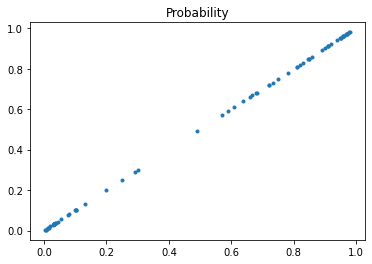


----
Achievement
LOSS = 198.5452 (14.0906)
LOSS = 0.2965 (0.5445)
LOSS = 0.2060 (0.4538)
LOSS = 0.1712 (0.4137)
LOSS = 0.1496 (0.3867)
LOSS = 0.1336 (0.3655)
LOSS = 0.1205 (0.3471)
LOSS = 0.1090 (0.3302)
Training loss: 1.246981e-01 (3.531262e-01)


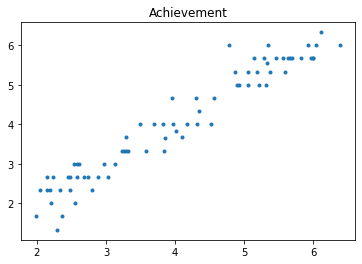


----
Independence
LOSS = 98.3654 (9.9179)
LOSS = 0.3660 (0.6050)
LOSS = 0.2099 (0.4582)
LOSS = 0.1192 (0.3453)
LOSS = 0.0651 (0.2551)
LOSS = 0.0352 (0.1876)
LOSS = 0.0206 (0.1436)
LOSS = 0.0132 (0.1149)
Training loss: 1.203608e-02 (1.097091e-01)


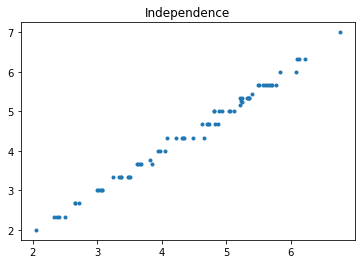


----
Recognition
LOSS = 211.6077 (14.5467)
LOSS = 0.4869 (0.6978)
LOSS = 0.1850 (0.4301)
LOSS = 0.1199 (0.3463)
LOSS = 0.0832 (0.2885)
LOSS = 0.0538 (0.2319)
LOSS = 0.0308 (0.1756)
LOSS = 0.0154 (0.1241)
Training loss: 4.629307e-03 (6.803901e-02)


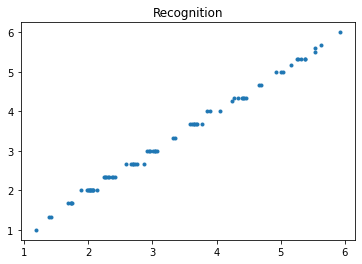


----
Relationships
LOSS = 66.6212 (8.1622)
LOSS = 0.3137 (0.5601)
LOSS = 0.1657 (0.4071)
LOSS = 0.0987 (0.3142)
LOSS = 0.0663 (0.2575)
LOSS = 0.0468 (0.2164)
LOSS = 0.0333 (0.1824)
LOSS = 0.0235 (0.1532)
Training loss: 2.037348e-02 (1.427357e-01)


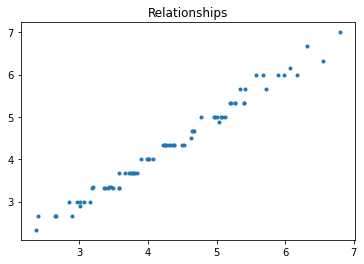


----
Support
LOSS = 45.5749 (6.7509)
LOSS = 0.1316 (0.3628)
LOSS = 0.0933 (0.3054)
LOSS = 0.0740 (0.2719)
LOSS = 0.0581 (0.2410)
LOSS = 0.0456 (0.2135)
LOSS = 0.0359 (0.1895)
LOSS = 0.0283 (0.1683)
Training loss: 1.644037e-02 (1.282200e-01)


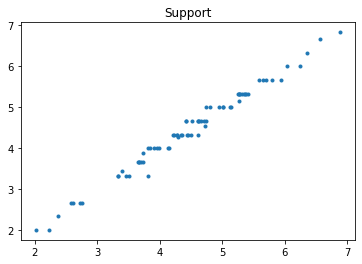


----
Working Conditions
LOSS = 37.2394 (6.1024)
LOSS = 0.1321 (0.3634)
LOSS = 0.0420 (0.2049)
LOSS = 0.0213 (0.1461)
LOSS = 0.0130 (0.1139)
LOSS = 0.0077 (0.0878)
LOSS = 0.0043 (0.0657)
LOSS = 0.0023 (0.0482)
Training loss: 1.714684e-03 (4.140874e-02)


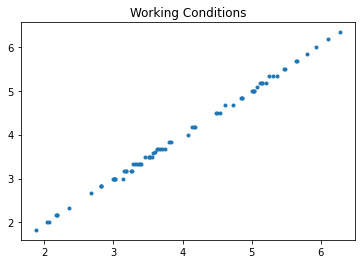

In [1077]:
trainingLosses = []
testingLosses = []

workValues = ['Probability', 'Achievement', 'Independence', 'Recognition','Relationships', 'Support', 'Working Conditions']

for wv in workValues:
    
    print('\n----\n{:s}'.format(wv))
    
    y = torch.tensor(df[wv].values, dtype=torch.float)
    
    train_mask = train_mask[torch.randperm(train_mask.size()[0])]
    test_mask = torch.abs(train_mask - 1)
    # Random test/train split
    
    data = Data(x=x, y=y, edge_index=edge_index.t().contiguous().T,train_mask = train_mask, test_mask = test_mask)
    
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = GCN().to(device)
    
    data = data.to(device)
    
    
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
    
    model.train()
    
    for epoch in range(800):
        optimizer.zero_grad()
        out = model(data)
        #loss = F.mse_loss(Variable(data.x[data.train_mask,0],requires_grad = True), data.y[data.train_mask])
        #loss = F.mse_loss(Variable(data.x[:,1],requires_grad = True), data.y)
        #loss = F.mse_loss(out[data.train_mask], data.y[data.train_mask])
        loss = F.mse_loss(out.flatten()[data.train_mask > 0.001], data.y[data.train_mask > 0.001])
        loss.backward()
        optimizer.step()
    
        if epoch % 100 == 0:
            print('LOSS = {:.4f} ({:.4f})'.format(loss.item(),np.sqrt(loss.item())))
            
            
    trainingLosses.append(loss.item())
    
    pred = model(data)
    loss = F.mse_loss(pred.flatten()[data.test_mask > 0.001],data.y[data.test_mask > 0.01])
    
    testingLosses.append(loss.item())
    
    print('Training loss: {:e} ({:e})'.format(loss.abs().item(),np.sqrt(loss.abs().item())))
    
    plt.plot(pred.flatten()[data.test_mask > 0.001].detach().numpy(),data.y[data.test_mask > 0.01],'.')
    plt.title(wv)
    plt.show()

In [1033]:
import collections

In [1069]:
threeLayer = d

In [1046]:
wvs = ['Probability', 'Achievement', 'Independence', 'Recognition','Relationships', 'Support', 'Working Conditions']

In [1068]:
if True:
    threeLayer = collections.OrderedDict()
    d = threeLayer
else:
    oneLayer = collections.OrderedDict()
    d = oneLayer

for tr,te,wv in zip(trainingLosses,testingLosses,wvs):
    print('{:s}\nTrain {:.3e}\nTest {:.3e}\n----\n'.format(wv,tr,te))
    
    d[wv] = [tr,te]

Probability
Train 3.799e-04
Test 2.650e-04
----

Achievement
Train 9.159e-05
Test 8.832e-05
----

Independence
Train 2.241e-03
Test 2.130e-03
----

Recognition
Train 1.405e-06
Test 1.485e-06
----

Relationships
Train 2.603e-06
Test 2.834e-06
----

Support
Train 9.507e-05
Test 7.102e-05
----

Working Conditions
Train 3.019e-02
Test 2.034e-02
----



(0.0, 0.11)

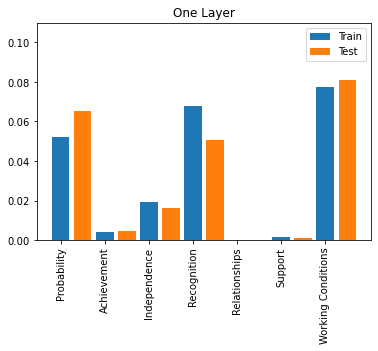

In [1064]:
ax = plt.subplot(111)

ax.bar(range(len(d.keys())),[v[0] for v in oneLayer.values()],0.4,label = 'Train')
ax.bar([r +0.5 for r in range(len(d.keys()))],[v[1] for v in oneLayer.values()],0.4,label = 'Test')

_ = plt.xticks(range(len(d.keys())),workValues,rotation = 90)

_ = plt.title('One Layer')

plt.legend()

plt.ylim(0,0.11)

(0.0, 0.11)

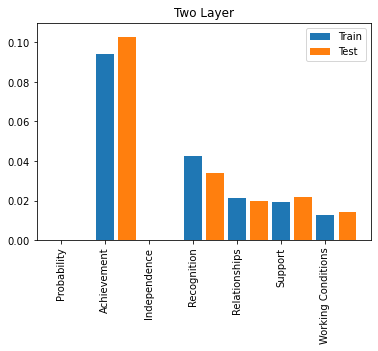

In [1065]:
ax = plt.subplot(111)

ax.bar(range(len(d.keys())),[v[0] for v in twoLayer.values()],0.4,label = 'Train')
ax.bar([r +0.5 for r in range(len(d.keys()))],[v[1] for v in twoLayer.values()],0.4,label = 'Test')

_ = plt.xticks(range(len(d.keys())),workValues,rotation = 90)

_ = plt.title('Two Layer')

plt.legend()

plt.ylim(0,0.11)

(0.0, 0.01)

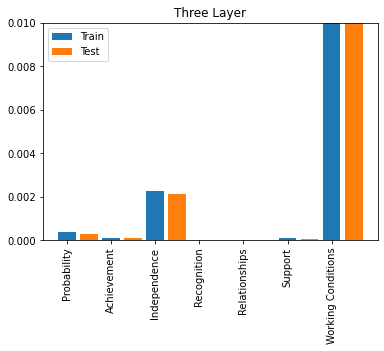

In [1072]:
ax = plt.subplot(111)

ax.bar(range(len(d.keys())),[v[0] for v in threeLayer.values()],0.4,label = 'Train')
ax.bar([r +0.5 for r in range(len(d.keys()))],[v[1] for v in threeLayer.values()],0.4,label = 'Test')

_ = plt.xticks(range(len(d.keys())),workValues,rotation = 90)

_ = plt.title('Three Layer')

plt.legend()

plt.ylim(0,0.01)

## Mostly Garbage Below

In [964]:
data.y.detach().numpy()[data.test_mask > 0.01]

array([6.5      , 5.67     , 5.165    , 5.33     , 4.67     , 5.       ,
       4.67     , 5.33     , 5.335    , 5.1928573, 4.33     , 4.2233334,
       5.       , 5.67     , 5.       , 4.443333 , 4.67     , 4.67     ,
       5.67     , 5.33     , 5.33     , 4.33     , 5.       , 4.33     ,
       4.33     , 4.67     , 4.89     , 4.       , 4.33     , 5.       ,
       5.       , 4.888889 , 5.33     , 3.67     , 3.67     , 4.       ,
       3.835    , 3.67     , 3.7766666, 4.       , 4.       , 3.33     ,
       4.67     , 5.113333 , 5.       , 5.       , 4.67     , 4.67     ,
       3.67     , 4.335    , 4.67     , 3.67     , 4.       , 4.33     ,
       5.33     , 4.67     , 4.       , 4.33     , 4.       , 4.67     ,
       3.67     , 3.33     , 4.665    , 5.33     , 4.835    , 4.33     ,
       4.33     , 5.33     , 5.33     , 5.       , 4.33     , 4.67     ,
       4.165    , 4.33     ], dtype=float32)

In [965]:
pred.detach().numpy()[data.test_mask > 0.01].flatten()

array([6.500285 , 5.6724377, 5.1634154, 5.334283 , 4.670336 , 5.0038505,
       4.6728387, 5.334068 , 5.3361607, 5.1927857, 4.329233 , 4.227877 ,
       5.009136 , 5.6692076, 5.0023327, 4.441025 , 4.6732383, 4.669834 ,
       5.6715612, 5.3322086, 5.3320923, 4.3260603, 5.0009212, 4.33142  ,
       4.327276 , 4.673511 , 4.889444 , 4.0036306, 4.3337893, 5.0015435,
       4.997691 , 4.8900104, 5.3316255, 3.671376 , 3.6657789, 4.00489  ,
       3.8402975, 3.675309 , 3.7754812, 4.0011015, 4.004677 , 3.3273304,
       4.6731224, 5.110247 , 5.0009704, 4.998426 , 4.669442 , 4.6700974,
       3.67254  , 4.333946 , 4.6734905, 3.6707106, 4.007004 , 4.332389 ,
       5.327133 , 4.6707597, 4.0027175, 4.3269067, 3.998578 , 4.6733785,
       3.6730669, 3.3309453, 4.663842 , 5.3297763, 4.832103 , 4.3329997,
       4.3345933, 5.328816 , 5.3312616, 4.999258 , 4.3304243, 4.67076  ,
       4.1667924, 4.3360667], dtype=float32)

In [907]:
for np in model.named_parameters():
    print(np)

('conv1.bias', Parameter containing:
tensor([-0.0381, -0.1076], requires_grad=True))
('conv1.lin.weight', Parameter containing:
tensor([[-0.2099,  0.1609, -0.5871,  0.0720,  0.0653, -0.4709],
        [ 0.2294,  0.6159, -0.8854,  0.7664,  0.5942, -0.1413]],
       requires_grad=True))
('conv2.bias', Parameter containing:
tensor([ 0.0261, -0.0039], requires_grad=True))
('conv2.lin.weight', Parameter containing:
tensor([[-0.8818, -0.6293],
        [ 0.0763, -0.4716]], requires_grad=True))
('conv3.bias', Parameter containing:
tensor([0.0077], requires_grad=True))
('conv3.lin.weight', Parameter containing:
tensor([[ 0.9487, -1.3316]], requires_grad=True))


In [904]:
for p in model.parameters():
    print(p)

Parameter containing:
tensor([-0.0381, -0.1076], requires_grad=True)
Parameter containing:
tensor([[-0.2099,  0.1609, -0.5871,  0.0720,  0.0653, -0.4709],
        [ 0.2294,  0.6159, -0.8854,  0.7664,  0.5942, -0.1413]],
       requires_grad=True)
Parameter containing:
tensor([ 0.0261, -0.0039], requires_grad=True)
Parameter containing:
tensor([[-0.8818, -0.6293],
        [ 0.0763, -0.4716]], requires_grad=True)
Parameter containing:
tensor([0.0077], requires_grad=True)
Parameter containing:
tensor([[ 0.9487, -1.3316]], requires_grad=True)


In [839]:
np.square(data.y.detach().numpy()[data.test_mask > 0.01] - pred.detach().numpy()[data.test_mask > 0.01].flatten()).mean()
# Manually calculate MSE

0.05166264

In [800]:
meanOfTraining = data.y.detach().numpy()[data.test_mask < 0.01].mean()

In [803]:
np.square(pred.detach().numpy()[data.test_mask > 0.01].flatten() - meanOfTraining).mean()

0.8112542

Text(0, 0.5, 'True')

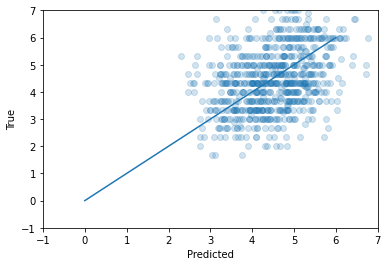

In [782]:
plt.scatter(pred.detach().numpy(),data.y.detach().numpy(),alpha = 0.2)

plt.xlim(-1,7)
plt.ylim(-1,7)

plt.plot([0,6],[0,6])

plt.xlabel('Predicted')
plt.ylabel('True')

Text(0, 0.5, 'True')

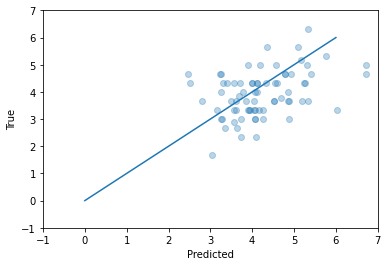

In [779]:
#plt.scatter(pred.detach().numpy()[data.test_mask],data.y.detach().numpy()[data.test_mask],alpha = 0.3)
plt.scatter(pred.detach().numpy()[data.test_mask > 0.01],data.y.detach().numpy()[data.test_mask > 0.01],alpha = 0.3)



plt.xlim(-1,7)
plt.ylim(-1,7)

plt.plot([0,6],[0,6])

plt.xlabel('Predicted')
plt.ylabel('True')

In [668]:
data.test_mask.numpy().sum()

74

In [700]:
model.conv1.

GCNConv(-1, 4)